In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001137547"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001137547
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,UNITED SECURITY BANCSHARES
Ticker,UBFO


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,45.0,6.097333e+00,1.314476e+00,4.64,5.37,5.77,6.13,10.38
interest income,46.0,7.614666e+06,2.396885e+06,7574.00,6476750.00,7606500.00,8751000.00,12847000.00
net income,46.0,1.559684e+06,1.775497e+06,-5807000.00,1057000.00,1770000.00,2621000.00,4007000.00
net interest income,46.0,6.303075e+06,2.441262e+06,-2561000.00,5654750.00,6782500.00,7602500.00,9460000.00
provision for loan losses,37.0,7.111796e+05,1.971021e+06,-1150000.00,-9000.00,22000.00,519000.00,9099000.00


# Plots

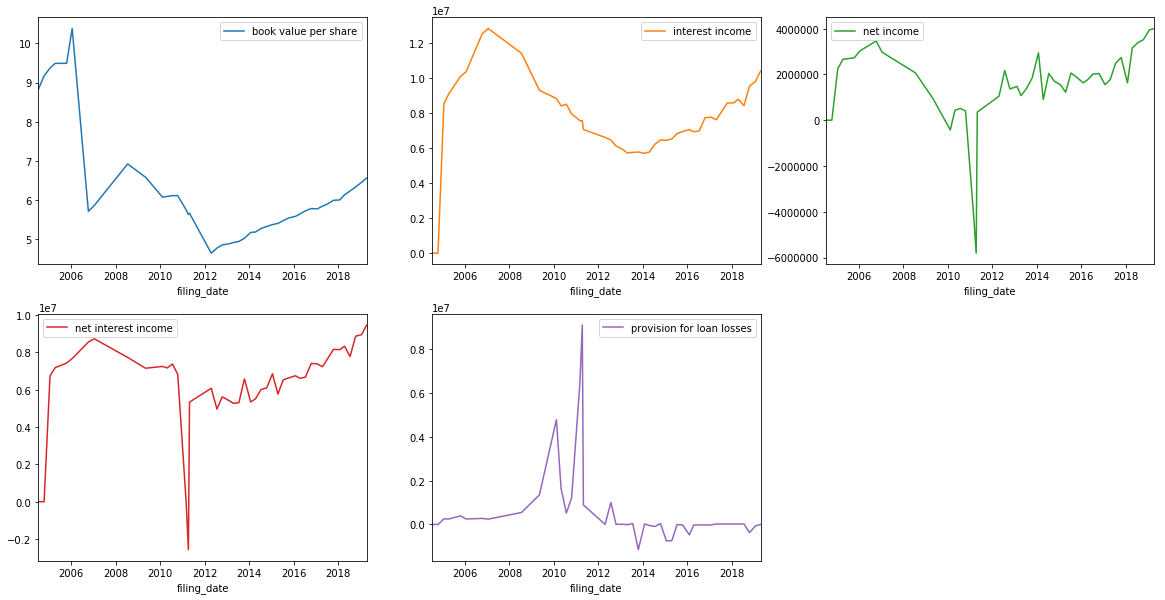

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                
0001137547 book value per share       2005Q2 to 2005Q3: 2 periods    missing   
           book value per share       2006Q1 to 2006Q2: 2 periods    missing   
           book value per share       2007Q1 to 2008Q1: 5 periods    missing   
           book value per share       2008Q3 to 2008Q4: 2 periods    missing   
           book value per share       2009Q2 to 2009Q3: 2 periods    missing   
           book value per share       2011Q2 to 2011Q4: 3 periods    missing   
           interest income                                 2005Q2    missing   
           interest income            2006Q1 to 2006Q2: 2 periods    missing   
           interest income            2007Q1 to 2008Q1: 5 periods    missing   
           interest income            2008Q3 to 2008Q4: 2 periods    missing   
           interest income            2009Q2 to 2009Q3: 2 periods    missing   
           interest income            2011Q2 to 2011Q4: 3 periods    missing   
           net income                                      2005Q2    missing   
           net income                 2006Q1 to 2006Q2: 2 periods    missing   
           net income                 2007Q1 to 2008Q1: 5 periods    missing   
           net income                 2008Q3 to 2008Q4: 2 periods    missing   
           net income                 2009Q2 to 2009Q3: 2 periods    missing   
           net income                                      2010Q4  duplicate   
           net income                 2011Q2 to 2011Q4: 3 periods    missing   
           net interest income                             2005Q2    missing   
           net interest income        2006Q1 to 2006Q2: 2 periods    missing   
           net interest income        2007Q1 to 2008Q1: 5 periods    missing   
           net interest income        2008Q3 to 2008Q4: 2 periods    missing   
           net interest income        2009Q2 to 2009Q3: 2 periods    missing   
           net interest income                             2010Q4  duplicate   
           net interest income        2011Q2 to 2011Q4: 3 periods    missing   
           provision for loan losses                       2005Q2    missing   
           provision for loan losses  2006Q1 to 2006Q2: 2 periods    missing   
           provision for loan losses  2007Q1 to 2008Q1: 5 periods    missing   
           provision for loan losses  2008Q3 to 2008Q4: 2 periods    missing   
           provision for loan losses  2009Q2 to 2009Q3: 2 periods    missing   
           provision for loan losses                       2010Q4  duplicate   
           provision for loan losses  2011Q2 to 2011Q4: 3 periods    missing   
           provision for loan losses                       2015Q1    missing   
           provision for loan losses  2016Q2 to 2016Q4: 3 periods    missing   
           provision for loan losses  2017Q2 to 2018Q2: 5 periods    missing   
           total revenue                                     None      empty   

                                                 message  
cik        item                                           
0001137547 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing per

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()